In [37]:
import pandas as pd

In [38]:
## Data Ingestion
df=pd.read_csv(r'D:\MLproject\Portfolio_Projects\Insurance_premium\notebooks\data\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [39]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## No missing value is present in the data 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [42]:
df=df.drop(labels=['expenses'],axis=1)
df.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [43]:
df.duplicated().sum()

3

In [44]:
df[df.duplicated]

,age,sex,bmi,children,smoker,region
354,18,female,38.3,0,no,southeast
471,18,female,30.1,0,no,northeast
581,19,male,30.6,0,no,northwest


In [45]:
df=df.drop_duplicates()

In [46]:
df.duplicated().sum()

0

In [49]:
## segeregate numerical & categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

print("numerical columns:",numerical_columns)
print("categorical columns:",categorical_columns)

numerical columns: Index(['age', 'bmi', 'children'], dtype='object')
categorical columns: Index(['sex', 'smoker', 'region'], dtype='object')


In [50]:
df[categorical_columns].describe()

,sex,smoker,region
count,1335,1335,1335
unique,2,2,4
top,male,no,southeast
freq,675,1061,363


In [51]:
df['sex'].value_counts()

sex
male      675
female    660
Name: count, dtype: int64

In [52]:
df['smoker'].value_counts()

smoker
no     1061
yes     274
Name: count, dtype: int64

In [53]:
df['region'].value_counts()

region
southeast    363
southwest    325
northwest    324
northeast    323
Name: count, dtype: int64

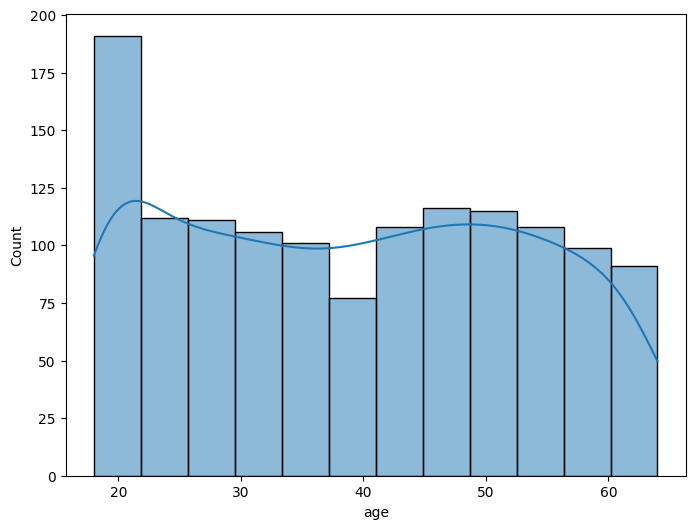

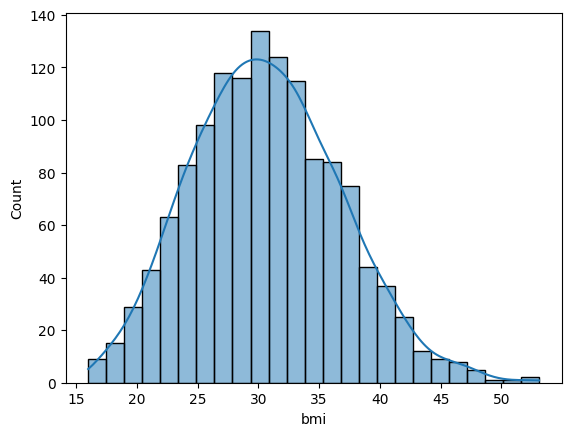

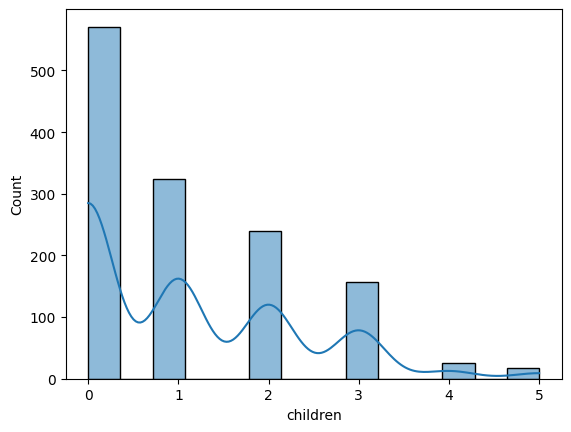

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

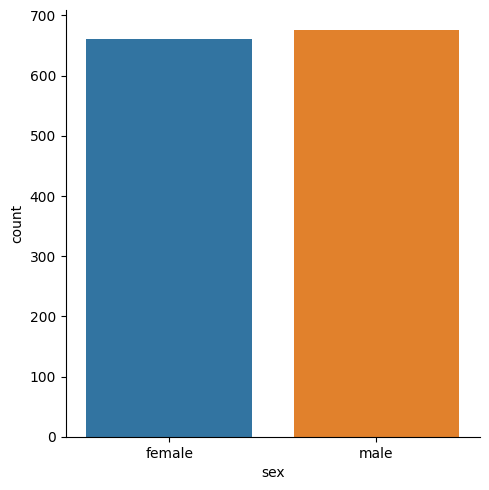

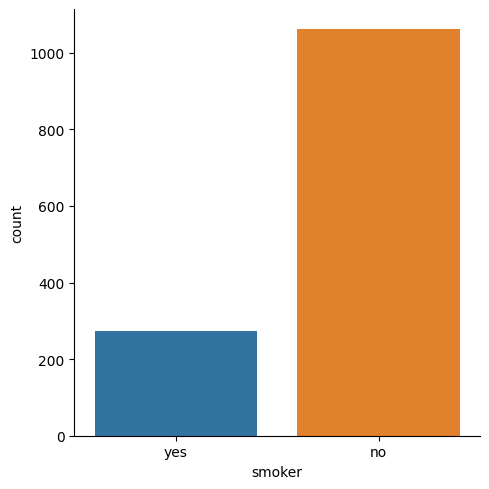

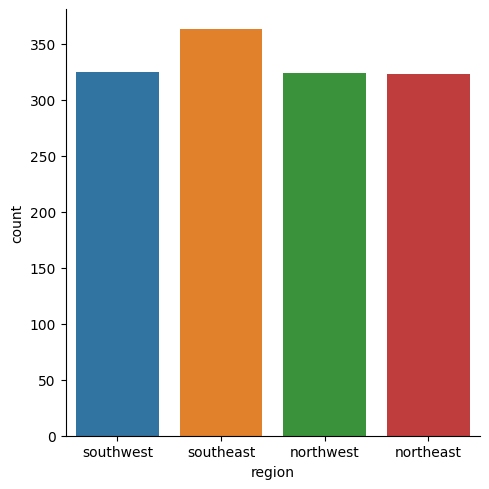

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
## plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:    
    sns.catplot(data=df, x=i, kind='count')
    print('\n')
    plt.show()

<Axes: >

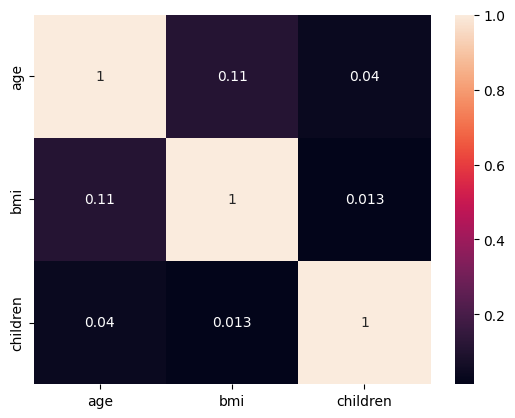

In [57]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)